[*********************100%%**********************]  4 of 4 completed


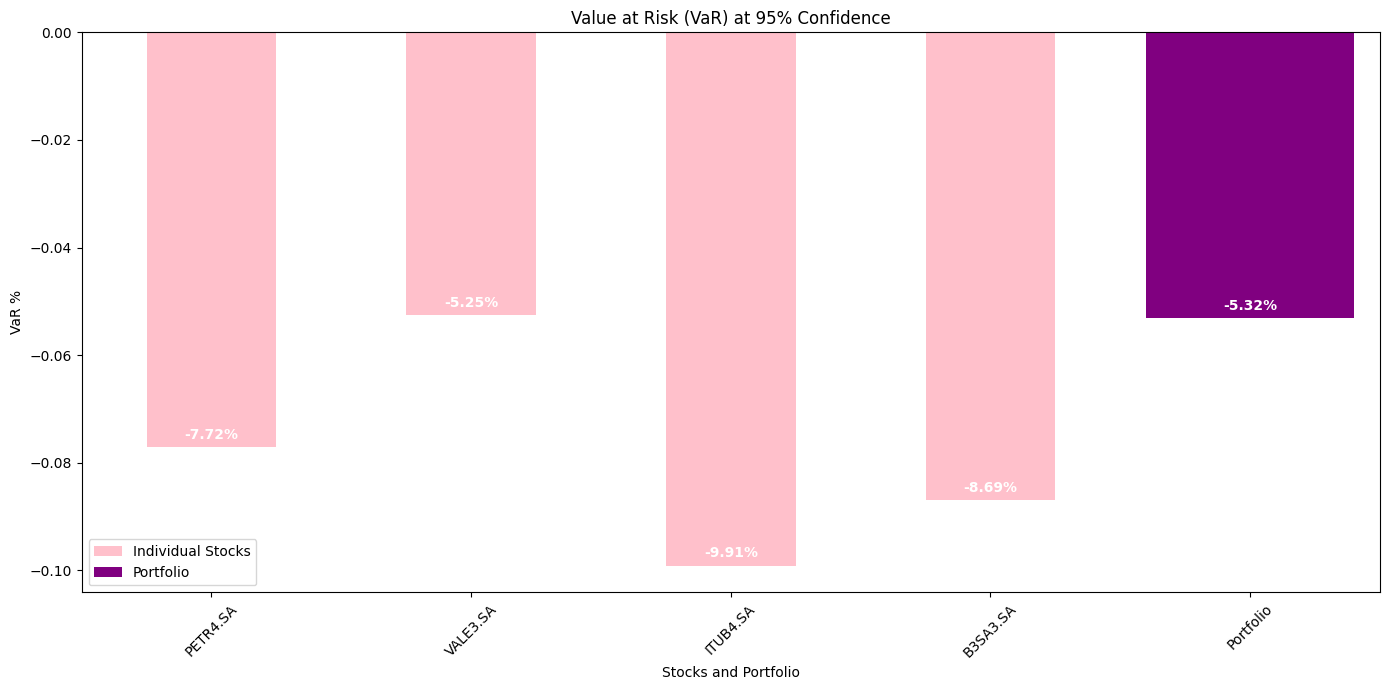

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Capturar os preços de fechamento semanais:
# Definindo os tickers
tickers = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "B3SA3.SA"]

# Obtendo dados dos últimos três anos
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=3)

data = yf.download(tickers, start=start_date, end=end_date, interval="1wk")
closing_prices = data['Close']

# 2. Calcular os log-retornos:
log_returns = np.log(closing_prices / closing_prices.shift(1))

# 3. Calcular o VaR (Valor em Risco) de 95% para os ativos individuais:
VaR_95_individual = log_returns.quantile(0.05)

# Alocando pesos iguais para os ativos
weights = [0.25, 0.25, 0.25, 0.25]  # 4 ativos, então 25% para cada

# Calculando o retorno da carteira
portfolio_log_returns = log_returns.dot(weights)

# Calculando o VaR da carteira
VaR_95_portfolio = portfolio_log_returns.quantile(0.05)

# 4. Gráfico de barras:
plt.figure(figsize=(14, 7))

# Adicionando VaR dos ativos individuais
VaR_95_individual.plot(kind='bar', color= "pink", label='Individual Stocks')

# Adicionando VaR da carteira
plt.bar(len(VaR_95_individual), VaR_95_portfolio, color= 'purple', label='Portfolio')

plt.title('Value at Risk (VaR) at 95% Confidence')
plt.ylabel('VaR %')
plt.xlabel('Stocks and Portfolio')
plt.xticks(list(range(len(tickers)+1)), tickers+['Portfolio'], rotation=45)

# Colocando os rótulos dos valores do VaR
for i, v in enumerate(list(VaR_95_individual) + [VaR_95_portfolio]):
    plt.text(i, v + 0.001, f'{v*100:.2f}%', ha='center', va='bottom', color='white', fontweight='bold')

# Ajustando os limites do eixo x
plt.xlim(-0.5, len(tickers)+0.5)

plt.legend()
plt.tight_layout()
plt.show()

[*********************100%%**********************]  4 of 4 completed


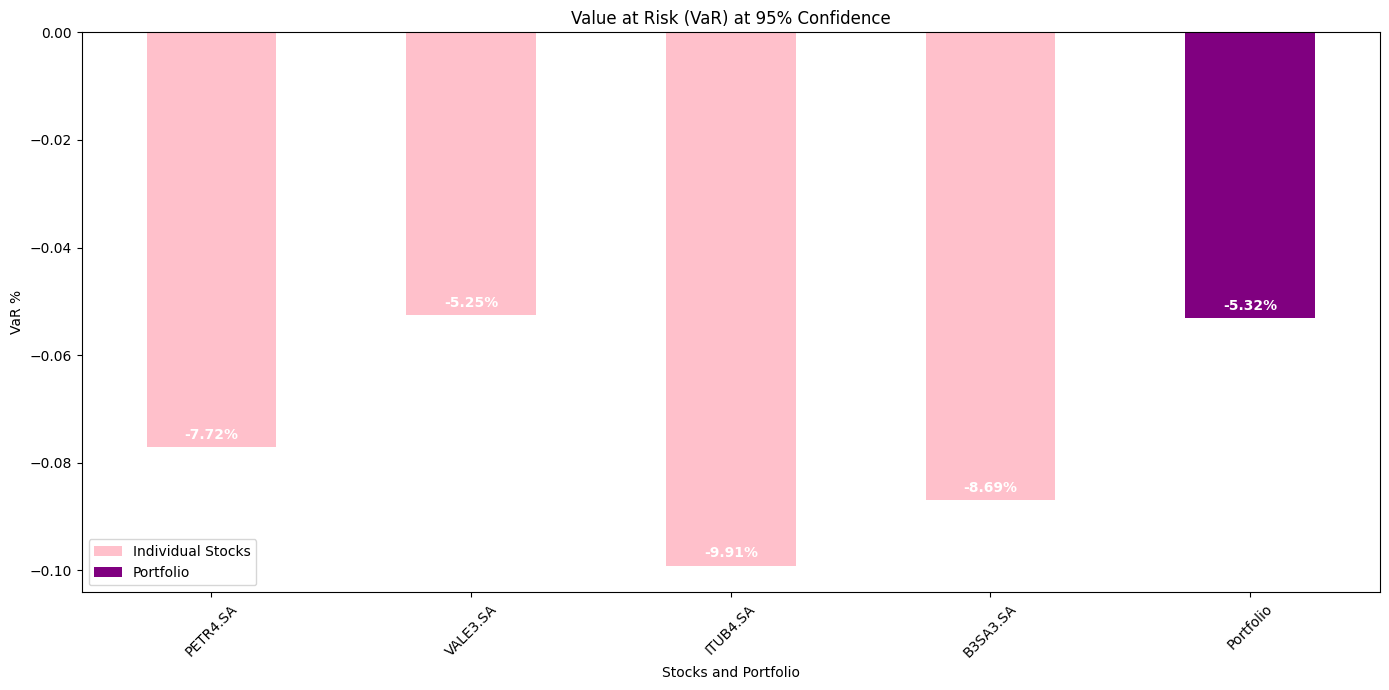

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Capturar os preços de fechamento semanais:
# Definindo os tickers
tickers = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "B3SA3.SA"]

# Obtendo dados dos últimos três anos
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=3)

data = yf.download(tickers, start=start_date, end=end_date, interval="1wk")
closing_prices = data['Close']

# 2. Calcular os log-retornos:
log_returns = np.log(closing_prices / closing_prices.shift(1))

# 3. Calcular o VaR (Valor em Risco) de 95% para os ativos individuais:
VaR_95_individual = log_returns.quantile(0.05)

# Alocando pesos iguais para os ativos
weights = [0.25, 0.25, 0.25, 0.25]  # 4 ativos, então 25% para cada

# Calculando o retorno da carteira
portfolio_log_returns = log_returns.dot(weights)

# Calculando o VaR da carteira
VaR_95_portfolio = portfolio_log_returns.quantile(0.05)

# 4. Gráfico de barras:
plt.figure(figsize=(14, 7))

# Adicionando VaR dos ativos individuais
VaR_95_individual.plot(kind='bar', color= 'pink', label='Individual Stocks')

# Adicionando VaR da carteira
plt.bar(len(VaR_95_individual), VaR_95_portfolio, color= 'purple', label='Portfolio', width= 0.5)

plt.title('Value at Risk (VaR) at 95% Confidence')
plt.ylabel('VaR %')
plt.xlabel('Stocks and Portfolio')
plt.xticks(list(range(len(tickers)+1)), tickers+['Portfolio'], rotation=45)

# Colocando os rótulos dos valores do VaR
for i, v in enumerate(list(VaR_95_individual) + [VaR_95_portfolio]):
    plt.text(i, v + 0.001, f'{v*100:.2f}%', ha='center', va='bottom', color='white', fontweight='bold')

# Ajustando os limites do eixo x
plt.xlim(-0.5, len(tickers)+0.5)

plt.legend()
plt.tight_layout()
plt.show()